In [2]:
%matplotlib inline
from matplotlib import pyplot as plt

In [3]:
import os
import sys
sys.path.append('..')
from chessvision.util import *
os.environ[STORAGE_ENV] = "/home/calum/Documents/uni/chess-vision/games"

In [4]:
from chessvision.game import *
# train_games = [
#     *(Game("Evans", i) for i in range(7)),
#     Game("Adams", 1),
#     Game("Adams", 2),
#     Game("Adams", 3),
#     Game("Kasparov", 0),
#     Game.from_file("Kasparov_0_.pkl"),
# ]
# valid_games = [
#     Game("Evans", 7),
#     Game("Bird", 2),
#     Game.from_file("Kasparov_0__.pkl")
# ]
train_games = list(Game("Nakamura", i) for i in range(6))
valid_games = list(Game("Nakamura", i) for i in range(6, 8))

## https://web.stanford.edu/class/cs231a/prev_projects_2016/CS_231A_Final_Report.pdf

In [58]:
save_games(train_games, labellers['type+'], 'ChessVision_data/train')
save_games(valid_games, labellers['type+'], 'ChessVision_data/test')

'ChessVision_data/test'

In [60]:
from ChessVision import train
from ChessVision import preprocessing
preprocessing.preprocessing_hog("ChessVision_data/train")

Processing HOG
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty
ChessVision_data/HOG/1/empty

In [61]:
train.train_hog()

training empty...
training pawn...
training knight...
training bishop...
training rook...
training queen...
training king...


In [5]:
from ChessVision import test
test.test_hog_calum()

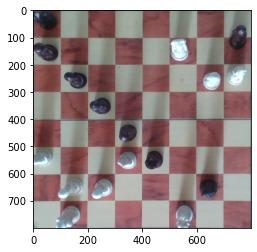

In [42]:
game = Game("Nakamura", 7)
images = list(game.images)
corners = find_corners(game.images)
img = cv2.cvtColor(get_board(images[74]['color'], corners), cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [ ]:
26.8, 25.9

In [43]:
y = test.test_hog_board(np.stack(get_squares(img)))

/home/calum/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [44]:
names = {
    'pawn': chess.Piece(chess.PAWN, chess.WHITE), 
    'king': chess.Piece(chess.KING, chess.WHITE), 
    'empty': None, 
    'knight': chess.Piece(chess.KNIGHT, chess.WHITE), 
    'bishop': chess.Piece(chess.BISHOP, chess.WHITE), 
    'rook': chess.Piece(chess.ROOK, chess.WHITE),
    'queen': chess.Piece(chess.QUEEN, chess.WHITE)
}

In [45]:
from copy import deepcopy

In [46]:
pieces = {i: deepcopy(names[p]) for i, p in enumerate(y) if names[p] is not None}
for i in range(32, 64):
    if i in pieces:
        pieces[i].color = chess.BLACK
pieces

{2: Piece.from_symbol('Q'),
 6: Piece.from_symbol('N'),
 9: Piece.from_symbol('P'),
 13: Piece.from_symbol('Q'),
 14: Piece.from_symbol('P'),
 19: Piece.from_symbol('P'),
 20: Piece.from_symbol('P'),
 23: Piece.from_symbol('P'),
 28: Piece.from_symbol('N'),
 37: Piece.from_symbol('p'),
 40: Piece.from_symbol('p'),
 41: Piece.from_symbol('p'),
 46: Piece.from_symbol('p'),
 50: Piece.from_symbol('p'),
 55: Piece.from_symbol('p'),
 63: Piece.from_symbol('b')}

In [56]:
pieces[9].color = chess.BLACK

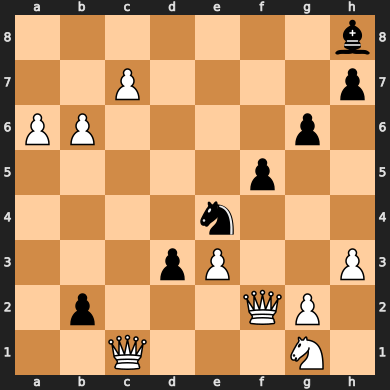

In [57]:
from cairosvg import svg2png
result = chess.Board()
result.set_piece_map(pieces)
svg2png(result._repr_svg_(), write_to='result_small_3.png')
result

In [10]:
cm = {'empty': {'empty': 349, 'pawn': 2, 'knight': 2, 'bishop': 2, 'rook': 1, 'queen': 0, 'king': 2}, 'pawn': {'empty': 3, 'pawn': 107, 'knight': 3, 'bishop': 1, 'rook': 2, 'queen': 0, 'king': 0}, 'knight': {'empty': 1, 'pawn': 11, 'knight': 27, 'bishop': 3, 'rook': 4, 'queen': 6, 'king': 3}, 'bishop': {'empty': 0, 'pawn': 23, 'knight': 4, 'bishop': 19, 'rook': 8, 'queen': 4, 'king': 0}, 'rook': {'empty': 2, 'pawn': 21, 'knight': 4, 'bishop': 5, 'rook': 17, 'queen': 3, 'king': 2}, 'queen': {'empty': 1, 'pawn': 13, 'knight': 3, 'bishop': 2, 'rook': 3, 'queen': 16, 'king': 5}, 'king': {'empty': 1, 'pawn': 3, 'knight': 2, 'bishop': 2, 'rook': 1, 'queen': 5, 'king': 18}}

In [63]:
cm = {'empty': {'empty': 192, 'pawn': 0, 'knight': 0, 'bishop': 0, 'rook': 0, 'queen': 0, 'king': 0}, 'pawn': {'empty': 2, 'pawn': 53, 'knight': 4, 'bishop': 3, 'rook': 3, 'queen': 2, 'king': 5}, 'knight': {'empty': 1, 'pawn': 10, 'knight': 14, 'bishop': 4, 'rook': 1, 'queen': 2, 'king': 1}, 'bishop': {'empty': 2, 'pawn': 11, 'knight': 2, 'bishop': 10, 'rook': 0, 'queen': 1, 'king': 0}, 'rook': {'empty': 0, 'pawn': 4, 'knight': 5, 'bishop': 1, 'rook': 10, 'queen': 1, 'king': 1}, 'queen': {'empty': 1, 'pawn': 16, 'knight': 1, 'bishop': 2, 'rook': 3, 'queen': 5, 'king': 1}, 'king': {'empty': 0, 'pawn': 0, 'knight': 3, 'bishop': 1, 'rook': 2, 'queen': 2, 'king': 2}}

In [64]:
[i.values() for i in cm.values()]

[dict_values([192, 0, 0, 0, 0, 0, 0]),
 dict_values([2, 53, 4, 3, 3, 2, 5]),
 dict_values([1, 10, 14, 4, 1, 2, 1]),
 dict_values([2, 11, 2, 10, 0, 1, 0]),
 dict_values([0, 4, 5, 1, 10, 1, 1]),
 dict_values([1, 16, 1, 2, 3, 5, 1]),
 dict_values([0, 0, 3, 1, 2, 2, 2])]

In [65]:
sum(j for i in cm.values() for j in i.values())

384

In [66]:
"accuracy (micro-average f1 score): ", sum(cm[piece][piece] for piece in cm) / sum(j for i in cm.values() for j in i.values())

('accuracy (micro-average f1 score): ', 0.7447916666666666)

In [67]:
"balanced accuracy (mean recall): ", sum(cm[piece][piece]/sum(v.values()) for piece, v in cm.items()) / len(cm)

('balanced accuracy (mean recall): ', 0.4817040239454033)

In [56]:
sum(cm[piece][piece]/sum(v.values())*sum(v.values()) for piece, v in cm.items()) / (len(cm) * sum(j for i in cm.values() for j in i.values()))

0.11033519553072625

## https://towardsdatascience.com/board-game-image-recognition-using-neural-networks-116fc876dafa

In [2]:
!git clone https://github.com/andrewleeunderwood/project_MYM.git

Cloning into 'project_MYM'...
remote: Enumerating objects: 51, done.
remote: Counting objects: 100% (51/51), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 51 (delta 26), reused 32 (delta 12), pack-reused 0
Unpacking objects: 100% (51/51), 72.02 KiB | 1.04 MiB/s, done.


In [68]:
save_games(train_games, labellers['all'], root_dir='project_MYM_data/train')
save_games(valid_games, labellers['all'], root_dir='project_MYM_data/test')

'project_MYM_data/test'

In [69]:
!echo test
!cd project_MYM_data/test && find . -type f | cut -d/ -f2 | sort -n | uniq -c
!echo train
!cd project_MYM_data/train && find . -type f | cut -d/ -f2 | sort -n | uniq -c

test
     39 0
     33 1
     14 2
     19 3
     14 4
     12 5
     12 6
     10 7
     14 8
     15 9
      4 10
      6 11
    192 12
train
    120 0
    122 1
     56 2
     54 3
     50 4
     55 5
     48 6
     33 7
     46 8
     60 9
     50 10
     43 11
    737 12


In [9]:
import pickle
with open('confusion.pkl', 'rb') as f:
    cm = pickle.load(f)
f

EOFError: Ran out of input

# Other stuff

In [6]:
from chessvision.game import *
from chessvision.interpret import *
from torch.utils.data.dataloader import DataLoader
import matplotlib.pyplot as plt
import cv2

In [26]:
path = "/home/calum/Documents/uni/chess-vision/venv/.guild/runs/3c6578add92b49c2b92e8ee9c6b0e017"

In [27]:
model = torch.load(os.path.join(path, "model"), 'cuda')
config = torch.load(os.path.join(path, "config"), 'cuda')

In [28]:
ds = ChessFolder(root=save_games(config.train_games, config.labeller), transform=config.infer_transform)
loader = DataLoader(ds, batch_size=100, num_workers=4)

In [29]:
iterp = Interpreter(model, loader, config.loss_fn, config.labeller)

In [43]:
cv2.normalize(iterp.filter_visual('fc.2', 0).numpy(), None, 0, 255, cv2.NORM_MINMAX, dtype=32)

LOSS: -34.50407409667969: 100%|██████████| 30/30 [00:00<00:00, 44.01it/s] 

torch.Size([1, 2])


array([[[178, 172, 136],
        [175, 145,  88],
        [125, 110, 114],
        ...,
        [173, 183, 145],
        [214, 163,  96],
        [177, 185, 125]],

       [[147, 127,  49],
        [183, 159,  61],
        [133,  83,  62],
        ...,
        [187, 182, 179],
        [198, 162, 135],
        [104,  63, 104]],

       [[142, 160, 113],
        [209, 189, 159],
        [195, 117,  57],
        ...,
        [166, 177, 151],
        [ 58,  61,  40],
        [113, 138, 170]],

       ...,

       [[100, 116, 135],
        [107, 108, 116],
        [125, 116,  98],
        ...,
        [133, 153, 145],
        [183, 159, 150],
        [150, 151, 140]],

       [[ 85, 102, 126],
        [153, 144, 180],
        [122, 141, 105],
        ...,
        [161, 134, 139],
        [216, 207, 191],
        [ 96,  41,  35]],

       [[169, 170, 172],
        [108, 132, 136],
        [ 72, 129, 103],
        ...,
        [ 93,  87, 121],
        [202, 129, 172],
        [193,  67,  80]]

LOSS: -396.01177978515625: 100%|██████████| 30/30 [00:00<00:00, 44.68it/s]


torch.Size([1, 2])


LOSS: -194.28533935546875: 100%|██████████| 30/30 [00:00<00:00, 43.75it/s]


torch.Size([1, 2])


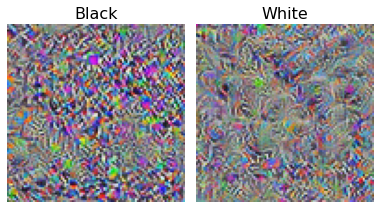

In [47]:
f = plt.figure(figsize=(8, 8))
# f.suptitle("Predicted | Actual | Loss", fontsize=20)
for i in range(2):
    piece = config.labeller.names[i]
    plt.subplot(2, 3, i+1)
    plt.title(piece, fontsize=16)
    # gray = cv2.cvtColor(iterp.filter_visual('fc.2', i, lr=100000).numpy(), cv2.COLOR_RGB2GRAY)
    img = cv2.normalize(iterp.filter_visual('fc.2', i, lr=1).numpy(), None, 0, 255, cv2.NORM_MINMAX, dtype=32)
    plt.imshow(img, cmap='spring')
    plt.axis("off")
plt.tight_layout()

In [18]:
config.labeller.names[3]

'rook'

In [18]:
plt.imshow(iterp.filter_visual('layer2.2', 3))

AttributeError: Sequential has no attribute `2`

In [23]:
model

ConvRes(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
 

In [ ]:
from chessvision import models

In [ ]:
occupancy_model = torch.load("model")
piece_model = torch.load("model")
config = torch.load("config")

model = models.CombiModel(piece_model, occupancy_model)

In [ ]:
test_loader = DataLoader(
    ChessFolder(save_games(valid_games, labellers['all']), config.infer_transform),
    batch_size=25, 
    num_workers=2
)

In [ ]:
interp = Interpreter(
    model=torch.load("model"), 
    loader=test_loader,
    loss_fn=config.loss_fn,
    labeller=labellers['all']
)

In [ ]:
interp.plot_confusion_matrix()